# 이전과제 재 시각화 해보기

### 1. 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
# 새로운 새각화를 위한 라이브라리
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

# 그래프의 폰트 출력을 선명하게 (svg, retina 등이 있음)
matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
# 테마 설정: "default", "classic", "dark_background", "fivethirtyeight", "seaborn"
mpl.style.use("default")
# 이미지가 레이아웃 안으로 들어오도록 함
# https://matplotlib.org/stable/users/explain/axes/constrainedlayout_guide.html
mpl.rcParams.update({"figure.constrained_layout.use": True})

# seaborn 의 초기설정
#font, line, marker 등의 배율 설정: paper, notebook, talk, poster
sns.set_context("paper") 
#배색 설정: tab10, Set2, Accent, husl
sns.set_palette("Set2") 
#눈금, 배경, 격자 설정: ticks, white, whitegrid, dark, darkgrid
# withegrid: 눈금을 그리고, 각 축의 눈금을 제거
sns.set_style("whitegrid") 

# 로컬에서(Window) 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

### 2. 파일 불러오기 및 info 로 정보 보기 판단하기 및 데이터 확인 하기 전처리
- Age 에 결측치가 너무 많다.
- 또한 Embarked 는 결측갯수가 적어 없애버렸다.

In [3]:
# sibsp = sibling, parch=직계, embarked=어디에서 탔는가

sample = pd.read_csv("../datas/titanic_datas/train.csv",
                     index_col=0).astype({"Survived" : "category"})

sample.info()
sample.drop(columns="Embarked", inplace=True)

sample.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN


- sibling 과 parch는 가족이라 생각하여 하나로 합쳤다.

In [4]:
# 2. SibSp, Parch 는 가족이라 생각해서 하나로 합쳐버렸다
sample["Fam"] = sample["Parch"] + sample["SibSp"]
sample.drop(columns=["SibSp","Parch"], inplace=True)
sample.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Fam
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,1
5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,0


### 3. 숫자데이터 확인하기

#### 3-1. 요금과 나이에 관련한 데이터

In [5]:
sample.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Fam
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,1
5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,0


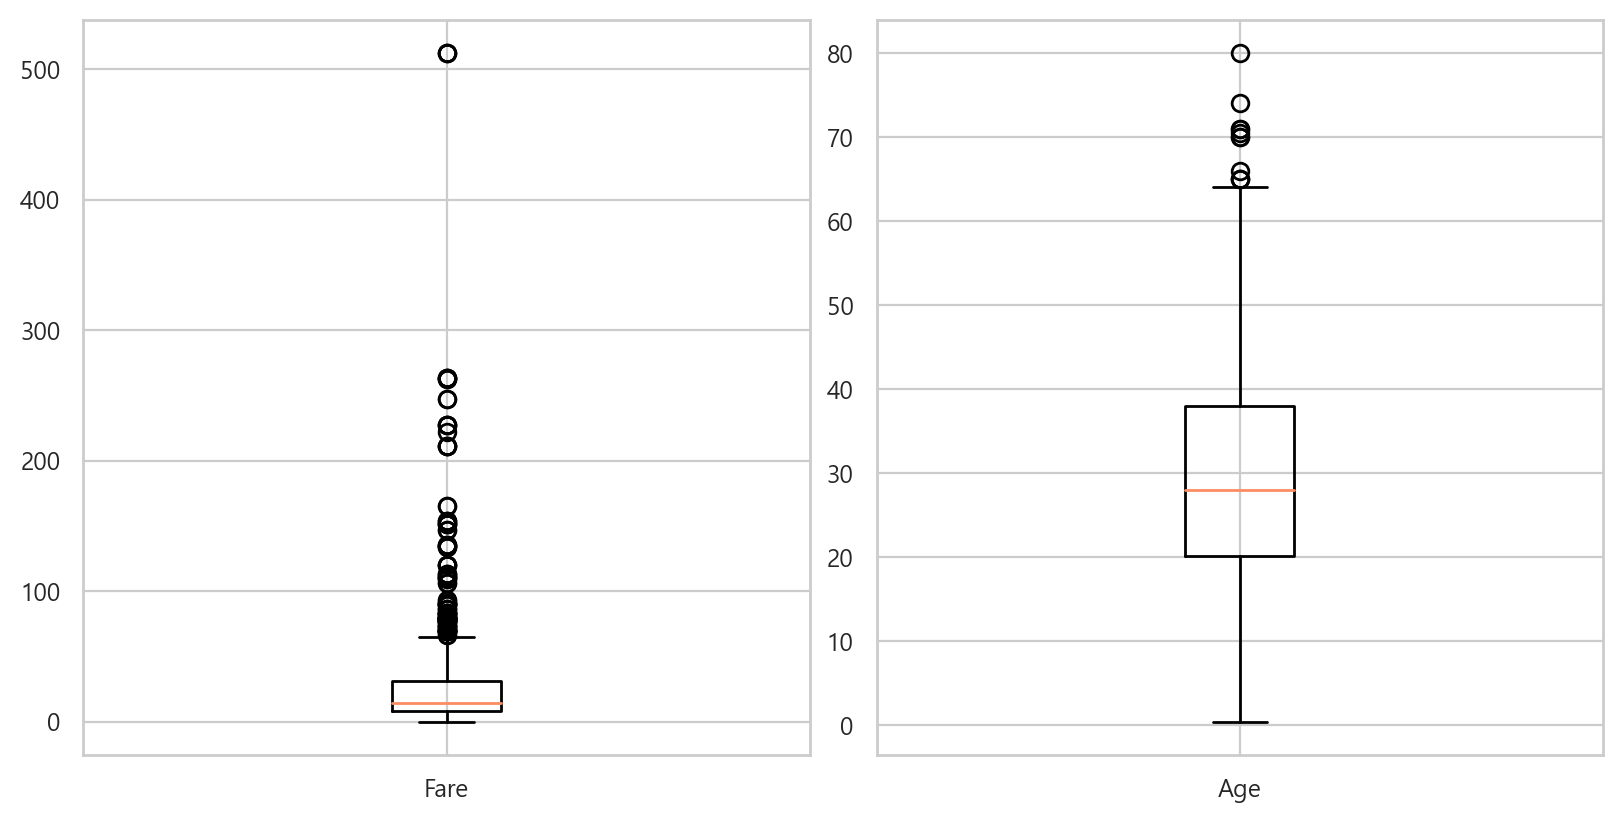

In [6]:
# Fare의 범위가 다양하지만 500 불의 값은 너무 높아 보인다.
# Age 값의 범위는 납득할 만하다.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
ax1.boxplot(sample["Fare"])
ax1.set_xticklabels(["Fare"])

ax2.boxplot(sample["Age"].dropna())
ax2.set_xticklabels(["Age"])

# 500 이넘는 숫자는 너무 적으므로 제외시켰다.
sample = sample[sample["Fare"] < 500]
# 이상치 파악 하기에는 violinplot 보다는 boxplot 이 더 나아 보여서 내비뒀다. 

#### 3-2 가족수와 요금과 관련한 데이터의 연관성 보기

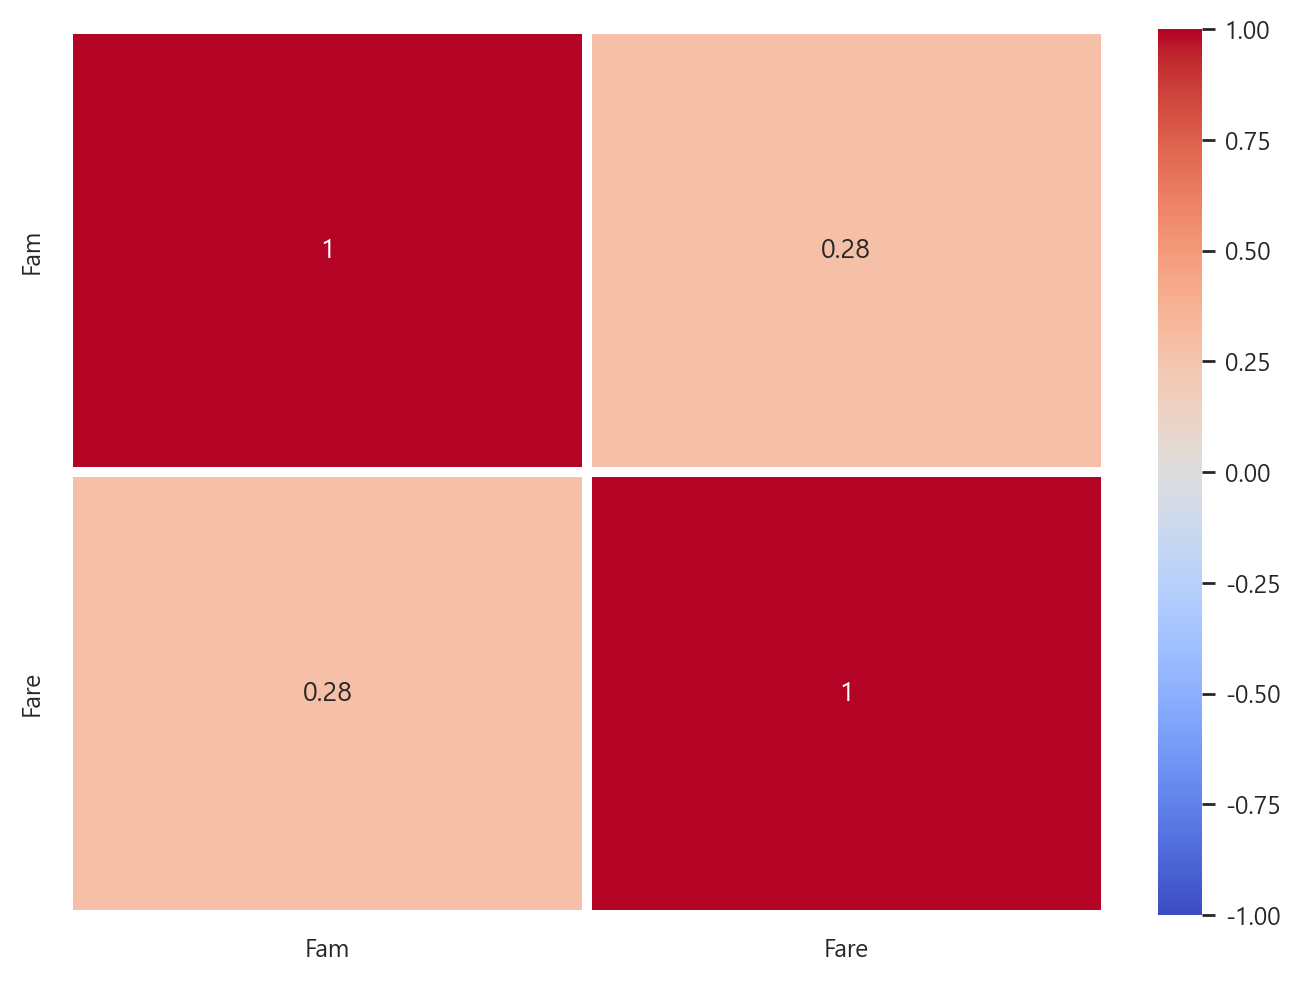

In [7]:
# 가족 수와 티켓 가격도 관련이 있는지 한 번 확인해 본다.
sample[["Fam","Fare"]].corr(method='pearson', min_periods=1).style.background_gradient(cmap='coolwarm')
# 약간의 관련은 있어 보여 냅뒀다.

# **Renewed
fig, ax = plt.subplots()
sns.heatmap(sample[["Fam","Fare"]].corr(),
            annot=True,
            cmap="coolwarm",
            vmin=-1,vmax=1,
            linewidths=3);

#### 3-3 결측치가 많은 나이 데이터를 보고 결측치 해결하기

##### 기존코드

```python
age_sex_1 = (sample["Pclass"] == 1) & (sample["Sex_man_is_one"] == 1)
age_sex_2 = (sample["Pclass"] == 1) & (sample["Sex_man_is_one"] == 0)
age_sex_3 = (sample["Pclass"] == 2) & (sample["Sex_man_is_one"] == 1)
age_sex_4 = (sample["Pclass"] == 2) & (sample["Sex_man_is_one"] == 0)
age_sex_5 = (sample["Pclass"] == 3) & (sample["Sex_man_is_one"] == 1)
age_sex_6 = (sample["Pclass"] == 3) & (sample["Sex_man_is_one"] == 0)
print("클래스별 남성 나이 평균 pclass 1 : ",sample[age_sex_1]["Age"].mean())
print("클래스별 여성 나이 평균 pclass 1 : ",sample[age_sex_2]["Age"].mean())
print("클래스별 남성 나이 평균 pclass 2 : ",sample[age_sex_3]["Age"].mean())
print("클래스별 여성 나이 평균 pclass 2 : ",sample[age_sex_4]["Age"].mean())
print("클래스별 남성 나이 평균 pclass 3 : ",sample[age_sex_5]["Age"].mean())
print("클래스별 여성 나이 평균 pclass 3 : ",sample[age_sex_6]["Age"].mean())
# 나이에 대한 결측치 해결 :
sample.loc[ age_sex_1  & sample["Age"].isna() , "Age"] = sample[age_sex_1]["Age"].mean()
sample.loc[ age_sex_2  & sample["Age"].isna() , "Age"] = sample[age_sex_2]["Age"].mean()
sample.loc[ age_sex_3  & sample["Age"].isna() , "Age"] = sample[age_sex_3]["Age"].mean()
sample.loc[ age_sex_4  & sample["Age"].isna() , "Age"] = sample[age_sex_4]["Age"].mean()
sample.loc[ age_sex_5  & sample["Age"].isna() , "Age"] = sample[age_sex_5]["Age"].mean()
sample.loc[ age_sex_6  & sample["Age"].isna() , "Age"] = sample[age_sex_6]["Age"].mean()
fig, ax = plt.subplots(1, 3,figsize=(10,4))
ax.boxplot([sample[age_sex_1]["Age"],
            sample[age_sex_2]["Age"],
            sample[age_sex_3]["Age"],
            sample[age_sex_4]["Age"],
            sample[age_sex_5]["Age"],
            sample[age_sex_6]["Age"],])
ax.set_xticklabels(["first_man",
                    "first_wom",
                    "secon_man",
                    "secon_wom",
                    "thrid_man",
                    "thrid_wom",]);
```


##### ---

class1, man,1 : 41.39818181818182
class1, man,0 : 34.607142857142854
class2, man,1 : 30.74070707070707
class2, man,0 : 28.722972972972972
class3, man,1 : 26.507588932806325
class3, man,0 : 21.75


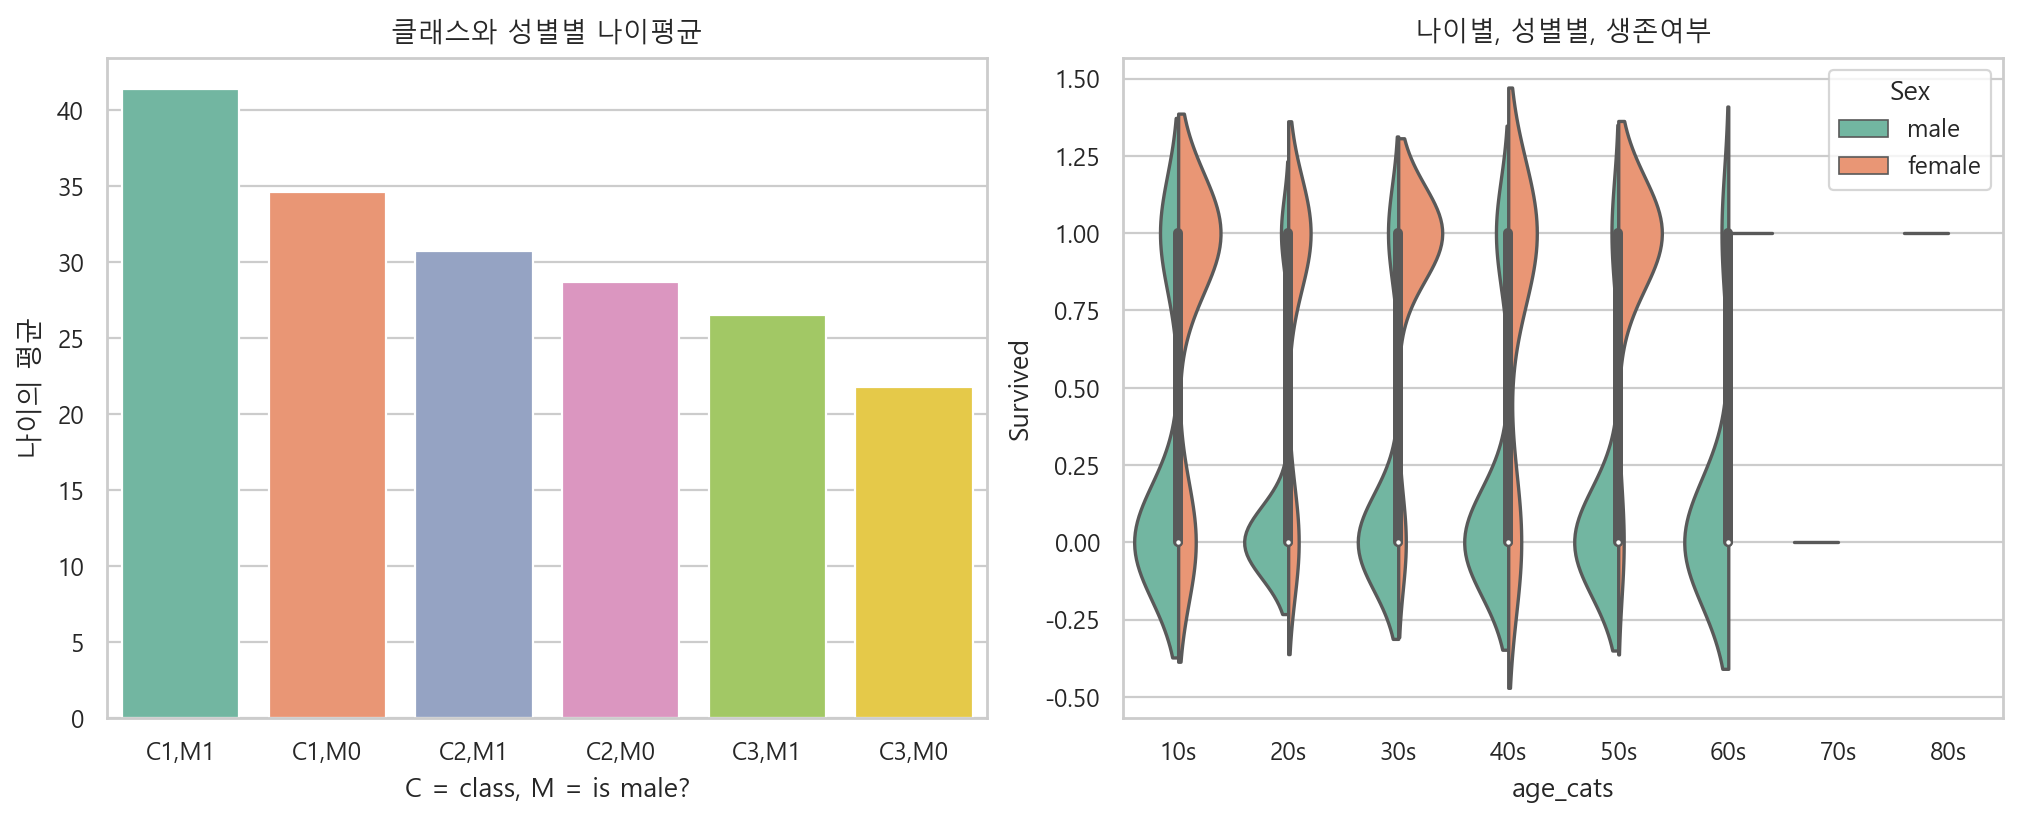

In [8]:
# **Renewed
sample.isna().sum()

age_dict = {}
sample["Sex_man_is_one"] = pd.get_dummies(sample["Sex"], drop_first=True)

for i in range(1,4):
    for j in range(1,-1,-1):
        age_sex = (sample["Pclass"] == i) & (sample["Sex_man_is_one"] == j)
        m_o_age = sample[age_sex]["Age"].mean()
        print(f"class{i}, man,{j} : {m_o_age}")
        sample.loc[ age_sex  & sample["Age"].isna() , "Age"] = m_o_age
        age_dict[f"C{i},M{j}"] = m_o_age

age_to_df = pd.DataFrame(age_dict.values(),age_dict.keys(), columns=["mean"])

age_cats = []
for age_ in sample["Age"]:
    if len(str(round(age_))) == 1:
        age_cats.append("10s")
    else:
        age_cats.append(str(round(age_))[0]+"0s")

sample["age_cats"] = age_cats
sample["age_cats"] = sample["age_cats"].astype("category")
sample["Survived"] = sample["Survived"].astype("int")

# **Renewed

fig, (ax, ax2) = plt.subplots(1,2, figsize=(10,4))
sns.barplot(data=age_to_df,
            x=age_to_df.index,
            y="mean",
            ax=ax)
ax.set_xlabel("C = class, M = is male?")
ax.set_ylabel("나이의 평균")
ax.set_title("클래스와 성별별 나이평균")

sns.violinplot(data=sample,
               x="age_cats",
               y="Survived",
               hue="Sex",
               split=True,
               ax = ax2)
ax2.set_title("나이별, 성별별, 생존여부");

### 4. Categorical 데이터

#### 1. Ticket (노미널 데이터)

In [9]:
# 티켓을 숫자만 있는 티켓과, 영어가 함께있는 티켓으로 나누어 보고 비교해 보았다.
sample["Ticket"].unique()
ticket_dict = {}

for i, k in sample.iterrows():
    for j in (str(sample["Ticket"].loc[i]).split(" ")):
        if j.isdigit() == False:
            ticket_dict[i] = str(j)
            break
        elif j.isdigit():
            ticket_dict[i] = "num"
            break
        else:
            pass

In [10]:
ticket_cats = pd.DataFrame(data=ticket_dict.values(), index=sample.index, columns=["ticket_cats"])
ticket_fare_fam = pd.merge(left=left, right=ticket_cats, how="inner", left_on=left.index, right_on=ticket_cats.index)

NameError: name 'left' is not defined

In [ ]:
ticket_fare_fam

,key_0,Fare,Fam,ticket_cats
0,1,7.2500,1,A/5
1,2,71.2833,1,PC
2,3,7.9250,0,STON/O2.
3,4,53.1000,1,num
4,5,8.0500,0,num
...,...,...,...,...
883,887,13.0000,0,num
884,888,30.0000,0,num
885,889,23.4500,3,W./C.
886,890,30.0000,0,num


숫자만 있는 티켓의 평균 가격 27.13089924357035
영어와 함께 있는 티켓의 평균 가격 40.631882378854634
숫자만 있는 티켓의 중간 가격 13.0
영어와 함께 있는 티켓의 중간 가격 20.25


,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Fam,Sex_man_is_one,age_cats,ticket_num
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,1,1,20s,A/5
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,1,0,30s,PC
3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,0,0,20s,STON/O2.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,1,0,30s,num
5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,0,1,30s,num


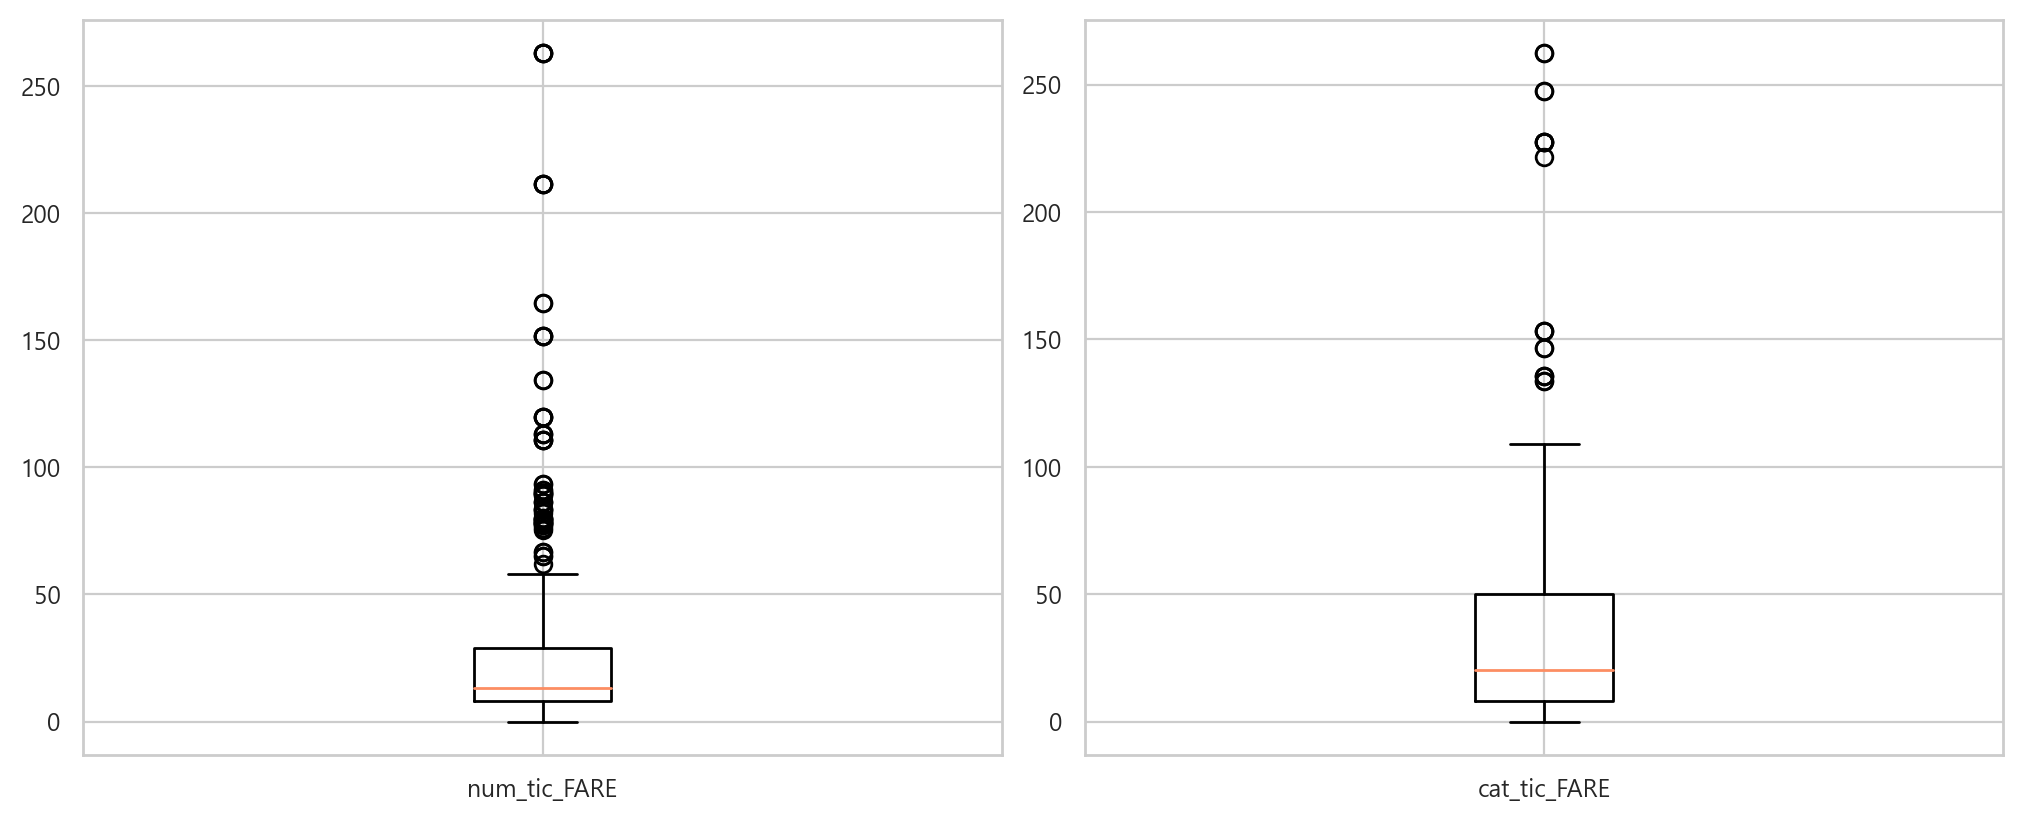

In [ ]:
# 넘버 티켓 확인
num_tic = ticket_fare_fam[ticket_fare_fam["ticket_cats"] == "num"]["Fare"]
cat_tic = ticket_fare_fam[ticket_fare_fam["ticket_cats"] != "num"]["Fare"]

# 일관화를 위해 처리
ticket_fare_fam["ticket_cats"] = ticket_fare_fam["ticket_cats"].str.lower()

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))

ax1.boxplot(num_tic)
ax1.set_xticklabels(["num_tic_FARE"]);

ax2.boxplot(cat_tic)
ax2.set_xticklabels(["cat_tic_FARE"]);

print("숫자만 있는 티켓의 평균 가격",num_tic.mean())
print("영어와 함께 있는 티켓의 평균 가격",cat_tic.mean())

print("숫자만 있는 티켓의 중간 가격",num_tic.median())
print("영어와 함께 있는 티켓의 중간 가격",cat_tic.median())

sample["ticket_num"] = ticket_cats
sample.head()
# 모델 훈련시 정확도 확인 필요

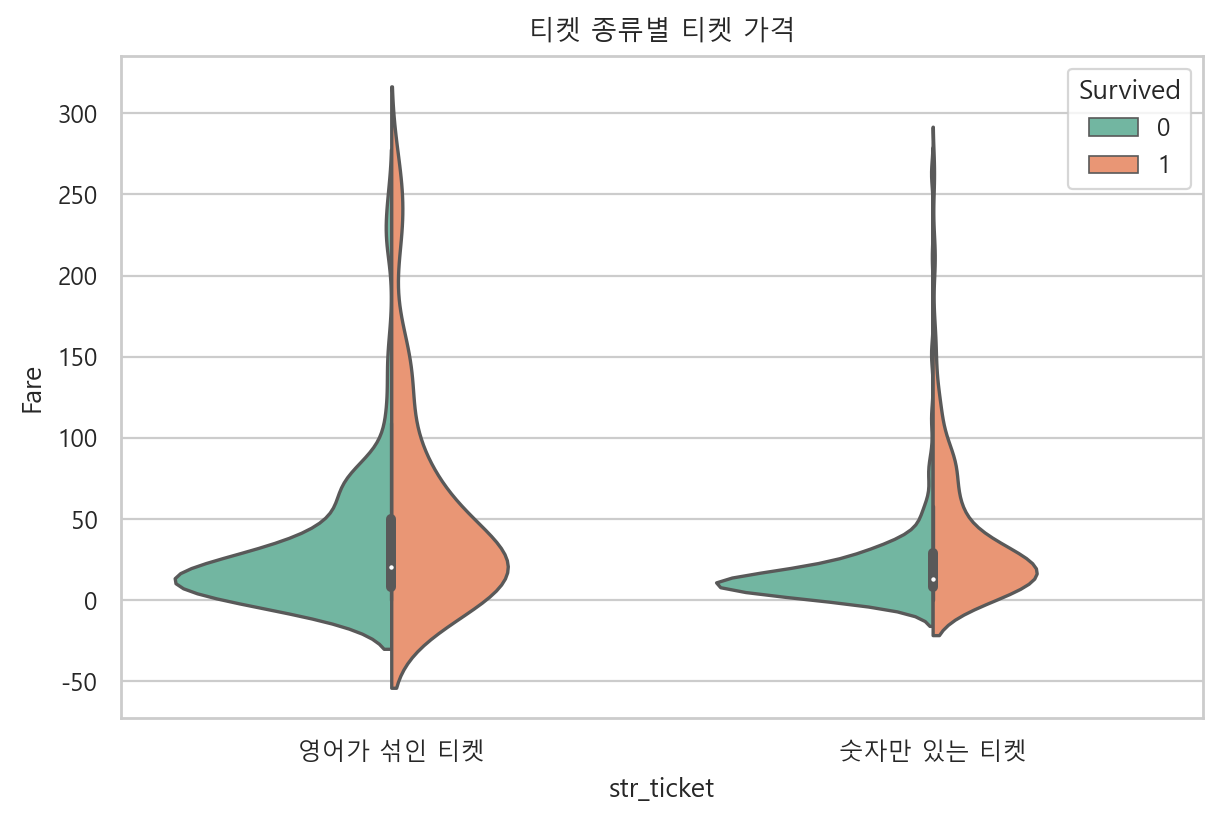

In [ ]:
ticket_fare_ = sample[["ticket_num", "Fare","Survived"]].copy()
ticket_fare_.loc[ticket_fare_["ticket_num"] != "num","ticket_num"] = "non_num"
ticket_fare_["str_ticket"] = pd.get_dummies(ticket_fare_, drop_first=True)["ticket_num_num"]
ticket_fare_
# find_out_corr_coppied = find_out_corr["str_ticket"].astype("category")


# graph_1 = find_out_corr[find_out_corr["ticket_num"]=="non_num"]["Fare"]
# graph_2 = find_out_corr[find_out_corr["ticket_num"]=="num"]["Fare"]

# # 서브플롯 생성
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

sns.violinplot(data=ticket_fare_,
               x="str_ticket",
               y="Fare",
               hue="Survived",
               split=True,
               ax = ax)
ax.set(title="티켓 종류별 티켓 가격",
       xticklabels=["영어가 섞인 티켓","숫자만 있는 티켓"]);

# 의미는 없어 보인다?

In [ ]:
# 클래스 원핫 인코딩하기
sample[["class_2","class_3"]] = pd.get_dummies(sample["Pclass"], prefix="class",drop_first=True)
sample.head(2)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Fam,Sex_man_is_one,age_cats,ticket_num,class_2,class_3
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,1,1,20s,A/5,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,1,0,30s,PC,0,0


### 최종 데이터 및 저장하기

In [ ]:
sample[["Name", "Pclass","class_2","class_3","Sex", "Sex_man_is_one","Age", "Fare", "Fam", "Survived"]]

,Name,Pclass,class_2,class_3,Sex,Sex_man_is_one,Age,Fare,Fam,Survived
PassengerId,,,,,,,,,,
1,"Braund, Mr. Owen Harris",3,0,1,male,1,22.00,7.2500,1,0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,0,female,0,38.00,71.2833,1,1
3,"Heikkinen, Miss. Laina",3,0,1,female,0,26.00,7.9250,0,1
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,0,female,0,35.00,53.1000,1,1
5,"Allen, Mr. William Henry",3,0,1,male,1,35.00,8.0500,0,0
...,...,...,...,...,...,...,...,...,...,...
887,"Montvila, Rev. Juozas",2,1,0,male,1,27.00,13.0000,0,0
888,"Graham, Miss. Margaret Edith",1,0,0,female,0,19.00,30.0000,0,1
889,"Johnston, Miss. Catherine Helen ""Carrie""",3,0,1,female,0,21.75,23.4500,3,0


In [ ]:
# sample.to_csv("../datas/titanic_datas/titinic_train_preprocessing.csv")